Final Project Submission

Please fill out:
* Student name: Kristine Petrosyan
* Student pace: part time
* Scheduled project review date/time: March 20th @ 11:00 AM CST 
* Instructor name: Victor Geislinger
* Blog post URL:


# Analysis of movie industry

Introduction

My employer(Microsoft) decided to create a new movie studio without knowing anything about creating movies. They have hired me to help them understand the movie industry and related pros and cons. I am in charge of doing data analysis and presenting what type of movies are doing the best last 10 years.

Goals

In this project the datasets from IMDb used to explore and understand what type of movies are doing the best in recent years.
With provided data we can anser to following questions:

Which producers/directors are making the most profitable movies based on ROI per movie?
Which highly rated genres are most profitable recently?

Which production budget ranges yield the most profitable movies?
How many movies released every year and every month? 
Which month of the year is more profitable? 


Importing the Data
The first step is to import any necessary libraries as shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [60]:
# showing numpy version
np.__version__

'1.16.5'

# Box Office 
This data will be useful to find total gross for movies.However due no title ID 
difficult to join. We have title, studio, year and domestic/foreign revenue 
information in here. 

In [2]:
df_gross=pd.read_csv('./zippedData/bom.movie_gross.csv')
df_gross.isna()
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# IMDB

This data includes title, year,genres and runtime minutes which can be useful. 

In [3]:
df_title=pd.read_csv('./zippedData/imdb.title.basics.csv')
df_title.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
df_names=pd.read_csv('./zippedData/imdb.name.basics.csv')
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [5]:
df_akas=pd.read_csv('./zippedData/imdb.title.akas.csv')
df_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [6]:
df_crew=pd.read_csv('./zippedData/imdb.title.crew.csv')
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [7]:
df_principals=pd.read_csv('./zippedData/imdb.title.principals.csv')
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [61]:
df_ratings=pd.read_csv('./zippedData/imdb.title.ratings.csv')
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Rotten Tomatoes
This dataframe has a lot of missing data.

In [9]:
df_info=pd.read_csv('./zippedData/rt.movie_info.tsv', delimiter='\t',encoding='utf-8')
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
This data contains info about ratings and reviews. 
I will come back to this later.

In [10]:
df_reviews=pd.read_csv('./zippedData/rt.reviews.tsv', delimiter='\t',encoding='latin1')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


# TMDB
This dataframe we will use to see movie's popularity.

In [11]:
df_popularity=pd.read_csv('./zippedData/tmdb.movies.csv')
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [63]:
df_budjets=pd.read_csv('./zippedData/tn.movie_budgets.csv')
df_budjets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
#noticed that there is more data connected with date compared to budget file
df_popularity= df_popularity.drop(df_popularity.columns[0], axis=1)

In [13]:
df_popularity.head(60)
df_popularity.isna()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False


In [14]:
df_popularity['release_date'] = pd.to_datetime(df_popularity['release_date'], format='%Y-%m-%d', errors='coerce')
df_popularity['release_date'].dtype

dtype('<M8[ns]')

In [15]:
df_popularity['release_year'] = df_popularity['release_date'].dt.year
df_popularity['release_month'] = df_popularity['release_date'].dt.month
    
df_popularity.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [16]:
df_popularity['release_year'].value_counts()[:20]

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
2019      63
2009      40
2008      14
2004      10
1986      10
2005       9
2006       9
2007       9
1995       8
2002       6
2000       5
Name: release_year, dtype: int64

In [18]:
releases.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010,2


No handles with labels found to put in legend.


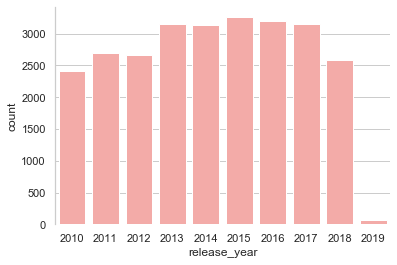

In [19]:
#releases = df_popularity.sort_values("release_year", ascending=True).tail(20)


sns.set_color_codes("pastel")
splot1 = sns.countplot(x="release_year", data=releases,
            label="Movie count from 2010 to 2019", color="r", orient='h')



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 100), ylabel="Count",
       xlabel="Release Year")
sns.despine(right=True, bottom=True)

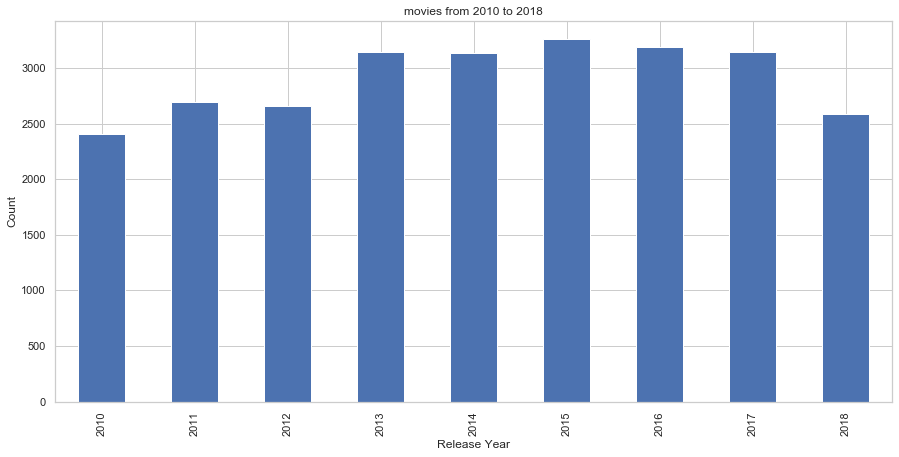

In [20]:

fig, ax = plt.subplots(figsize=(15,7))
df_popularity[(df_popularity["release_year"] >= 2010) & (df_popularity["release_year"] < 2019)
].groupby("release_year")['id'].count().plot.bar(ax=ax)
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('movies from 2010 to 2018')
plt.show()

# Profitability and ROI of Recent Movies
Since the most important part of this project is to find out how much money we need to spend on production and how much we will get back at the end it is crucial to show to our stockholders the financial part of the project.


In [22]:
#removing duplicates
df_budjets = df_budjets[~df_budjets.duplicated(subset=['movie'], 
                                               keep='first')].copy(deep=True)

In [70]:
df_budjets['release_date'] = pd.to_datetime(df_budjets['release_date'], 
                                        format='%b %d, %Y', errors='coerce')
df_budjets['release_year'] = df_budjets['release_date'].dt.year
df_budjets['release_month'] = df_budjets['release_date'].dt.month

In [71]:
df_budjets.astype({'production_budget': 'float64'}).dtypes

ValueError: could not convert string to float: '$425,000,000'

In [72]:

df_budjets['domestic_gross']=df_budjets['domestic_gross'].str.replace("$","").str.replace(",","").astype('float')

#df_budjets['production_budget'].map(remove_non_num).astype(float)

AttributeError: Can only use .str accessor with string values!

In [75]:
df_budjets['worldwide_gross']=df_budjets['worldwide_gross'].str.replace("$","").str.replace(",","").astype('float')

In [76]:
df_budjets['production_budget']=df_budjets['production_budget'].str.replace("$","").str.replace(",","").astype('float')

AttributeError: Can only use .str accessor with string values!

In [77]:
df_budjets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
release_year         5782 non-null int64
release_month        5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 361.5+ KB


In [80]:
#computing the net income
df_budjets['net_income']=(df_budjets['domestic_gross']+
                          df_budjets['worldwide_gross'])- df_budjets['production_budget']

In [81]:
#computing ROI for both worldwide and domestic
df_budjets['ROI_worldwide'] = (df_budjets['worldwide_gross'] - 
            df_budjets['production_budget']) / df_budjets['production_budget']
df_budjets['ROI_domestic'] = (df_budjets['domestic_gross'] - 
            df_budjets['production_budget']) / df_budjets['production_budget']
df_budjets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
release_year         5782 non-null int64
release_month        5782 non-null int64
net_income           5782 non-null float64
ROI_worldwide        5782 non-null float64
ROI_domestic         5782 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 497.0+ KB


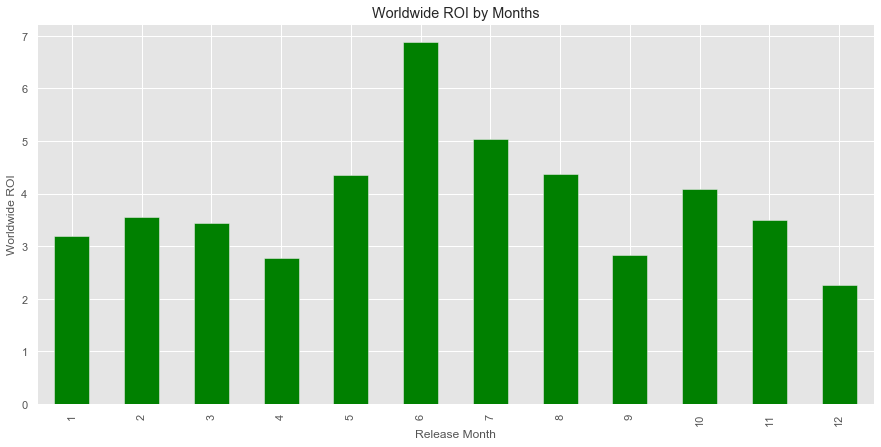

In [82]:
#showing the results
plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(15,7))
df_budjets.groupby('release_month')['ROI_worldwide'].mean().plot.bar(
    color=['green'])
ax.set_ylabel('Worldwide ROI')
ax.set_xlabel('Release Month')
ax.set_title('Worldwide ROI by Months')
plt.show()

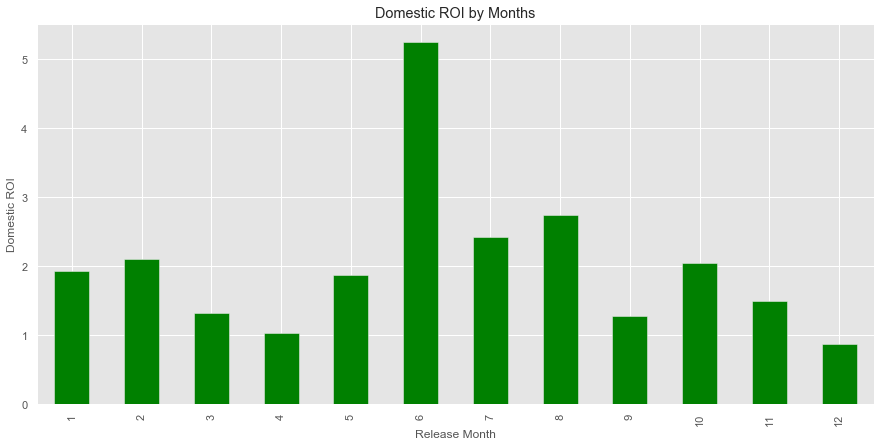

In [83]:
fig, ax = plt.subplots(figsize=(15,7))
df_budjets.groupby('release_month')['ROI_domestic'].mean().plot.bar(
    color=['green'])
ax.set_ylabel('Domestic ROI')
ax.set_xlabel('Release Month')
ax.set_title('Domestic ROI by Months')
plt.show()

In [84]:
df_budjets['net_income'].describe()

count    5.782000e+03
mean     1.017730e+08
std      2.108880e+08
min     -1.574753e+08
25%     -3.098222e+05
50%      2.499538e+07
75%      1.111648e+08
max      3.111853e+09
Name: net_income, dtype: float64

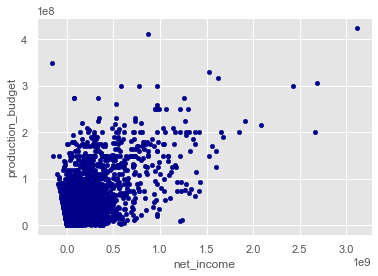

In [90]:
df_budjets.plot.scatter(x='net_income',
                      y='production_budget',
                      c='DarkBlue')


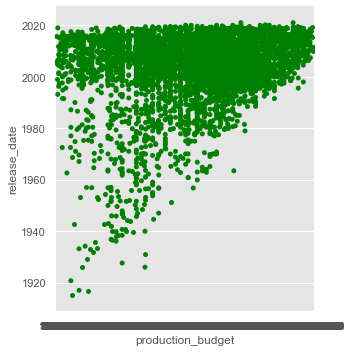

In [91]:

sns.catplot(x="production_budget", y="release_date", data=df_budjets, color='green')

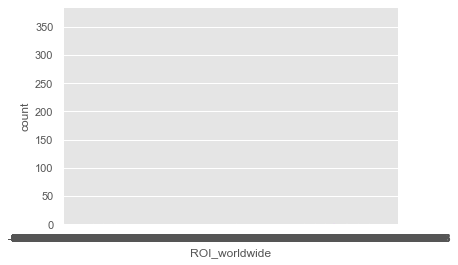

In [93]:


sns.countplot(x="ROI_worldwide", data=df_budjets)

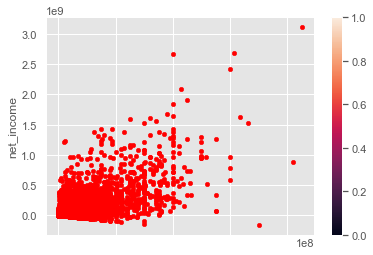

In [87]:
correlation_budget_income = df_budjets.plot.scatter(x='production_budget',
                      c='Red',
                      y='net_income',
                      colormap='viridis')

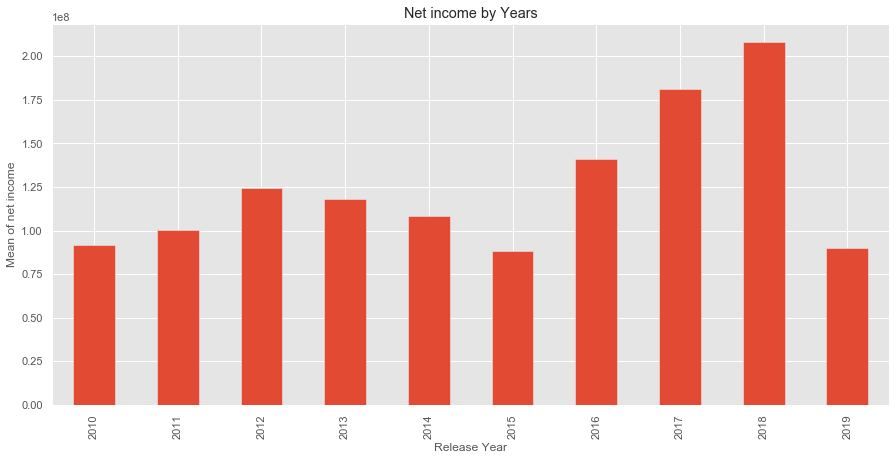

In [96]:
fig, ax = plt.subplots(figsize=(15,7))
df_budjets[(df_budjets["release_year"] >= 2010) & 
           (df_budjets["release_year"] <=2019)].groupby('release_year')['net_income'].mean().plot.bar()
ax.set_ylabel('Mean of net income')
ax.set_xlabel('Release Year')
ax.set_title('Net income by Years')
plt.show()

In [98]:
# Your code here - remember to use markdown cells for comments as well!
df_title_rename = df_title.rename(columns={"original_title": "title"})

In [99]:
df_title_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
title              146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [100]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [126]:
df_gross_nonna = df_gross.dropna()
df_title_rename_na= df_title_rename.dropna()


merged_table = pd.merge(df_gross_nonna, df_title_rename_na, how='inner', on= 'title')

In [127]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1637
Data columns (total 10 columns):
title              1638 non-null object
studio             1638 non-null object
domestic_gross     1638 non-null float64
foreign_gross      1638 non-null object
year               1638 non-null int64
tconst             1638 non-null object
primary_title      1638 non-null object
start_year         1638 non-null int64
runtime_minutes    1638 non-null float64
genres             1638 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 140.8+ KB


In [103]:
merged_table.head(200)
# merged_table.astype({'foreign_gross': 'float64'}).dtypes
colum = pd.to_numeric(merged_table['foreign_gross'],errors='coerce')
merged_table['foreign_gross'] = colum

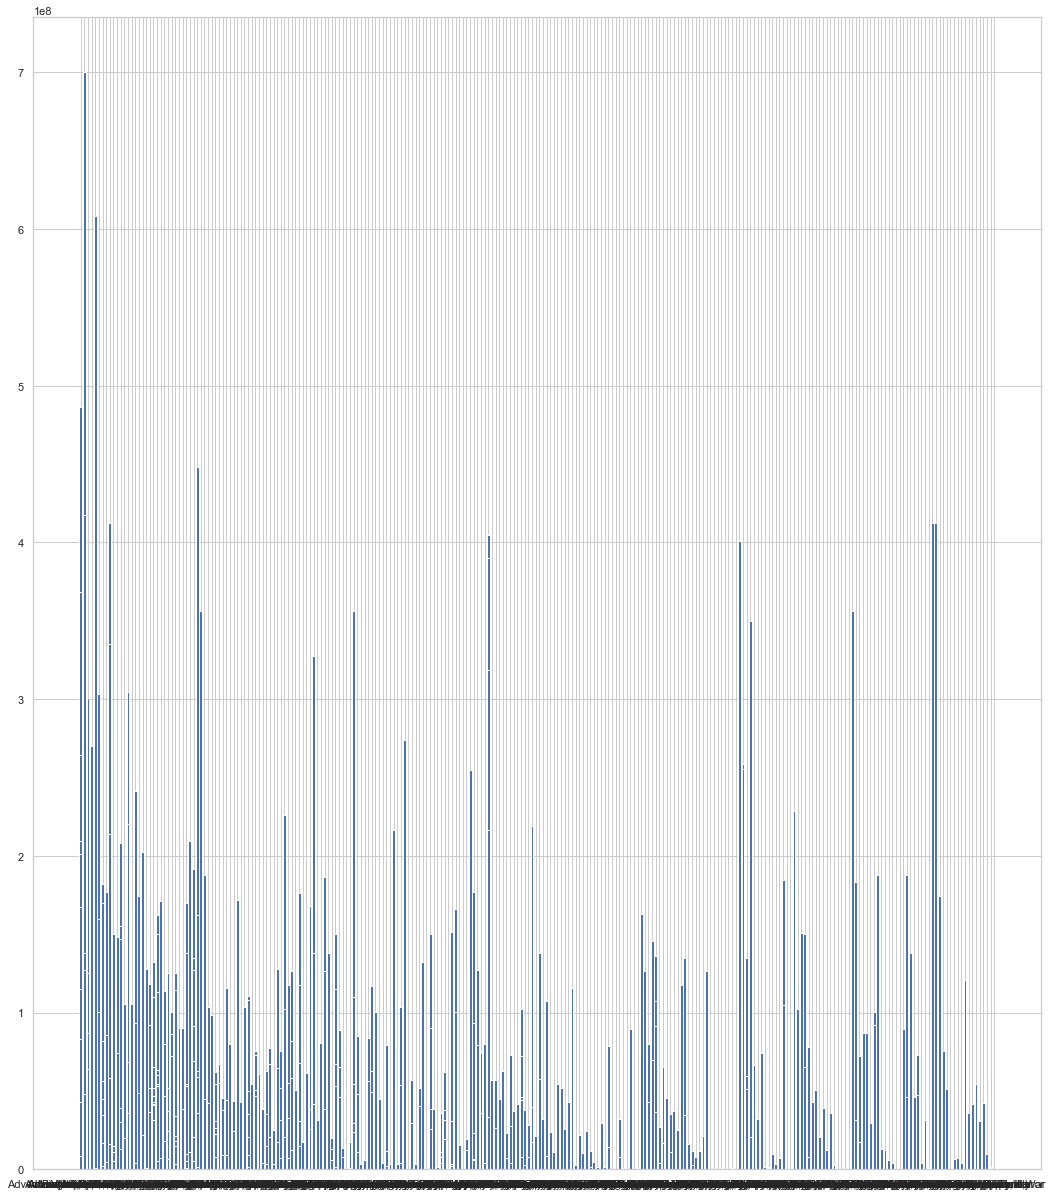

In [129]:
fig = plt.figure(figsize=(14,16,))
ax = fig.add_axes([0,0,1,1])
genres = merged_table['genres']
dgross = merged_table['domestic_gross']
ax.bar(genres,dgross)
plt.show()

In [105]:
domestic_gross_sum = merged_table.groupby(["genres"]).domestic_gross.sum().reset_index()

In [106]:
domestic_gross_sum

,genres,domestic_gross
0,Action,1.869770e+08
1,"Action,Adventure",3.510000e+04
2,"Action,Adventure,Animation",2.156515e+09
3,"Action,Adventure,Biography",2.400000e+08
4,"Action,Adventure,Comedy",3.162300e+09
...,...,...
247,"Romance,Sci-Fi,Thriller",6.250570e+07
248,"Romance,Thriller",5.473000e+05
249,Sci-Fi,4.126000e+08
250,Thriller,3.128255e+08


In [107]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 1637
Data columns (total 10 columns):
title              1638 non-null object
studio             1638 non-null object
domestic_gross     1638 non-null float64
foreign_gross      1635 non-null float64
year               1638 non-null int64
tconst             1638 non-null object
primary_title      1638 non-null object
start_year         1638 non-null int64
runtime_minutes    1638 non-null float64
genres             1638 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 220.8+ KB


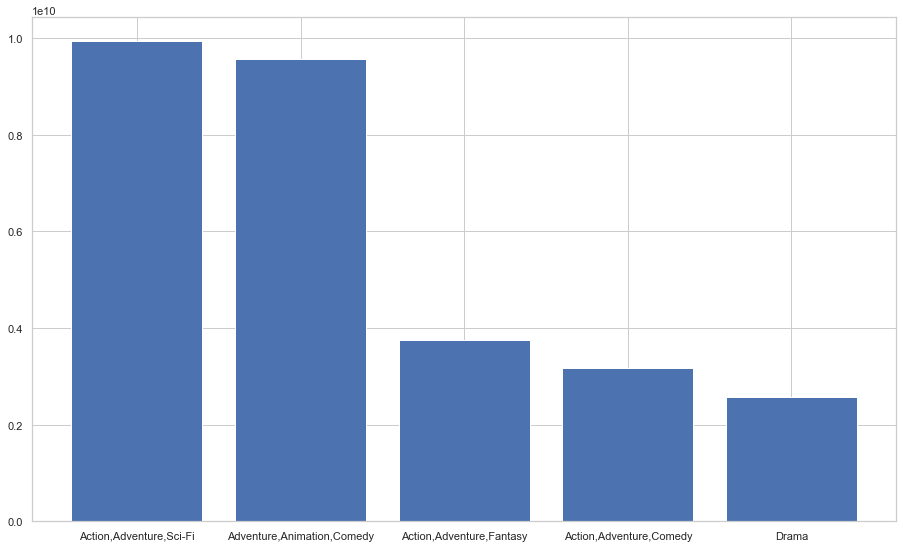

In [124]:
fig = plt.figure(figsize=(12,7,))
ax = fig.add_axes([0,0,1,1])
sorted_val = domestic_gross_sum.sort_values(by='domestic_gross', ascending=False).head(5)
genres = sorted_val['genres']
dgross = sorted_val['domestic_gross']
ax.bar(genres,dgross)
plt.show()

In [109]:
merged_table['total_income']= merged_table['domestic_gross'] + merged_table['foreign_gross']
#fig = plt.figure(figsize=(12,12,))
#ax = fig.add_axes([0,0,1,1])
#sorted_val = domestic_gross_sum.sort_values(by='foreign_gross', ascending=False).head(5)
#genres = sorted_val['genres']
#dgross = sorted_val['domestic_gross']
#ax.bar(genres,dgross)
#plt.show()
merged_table.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,total_income
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",6.239000e+08


In [110]:
ratings_merged_table = pd.merge(merged_table, df_ratings, how='inner', on='tconst')

In [111]:
ratings_merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
title              1517 non-null object
studio             1517 non-null object
domestic_gross     1517 non-null float64
foreign_gross      1514 non-null float64
year               1517 non-null int64
tconst             1517 non-null object
primary_title      1517 non-null object
start_year         1517 non-null int64
runtime_minutes    1517 non-null float64
genres             1517 non-null object
total_income       1514 non-null float64
averagerating      1517 non-null float64
numvotes           1517 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 165.9+ KB


In [112]:
ratings_merged_table.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,total_income,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",1.067000e+09,8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.283000e+08,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",7.526000e+08,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",6.985000e+08,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",6.239000e+08,7.0,657690


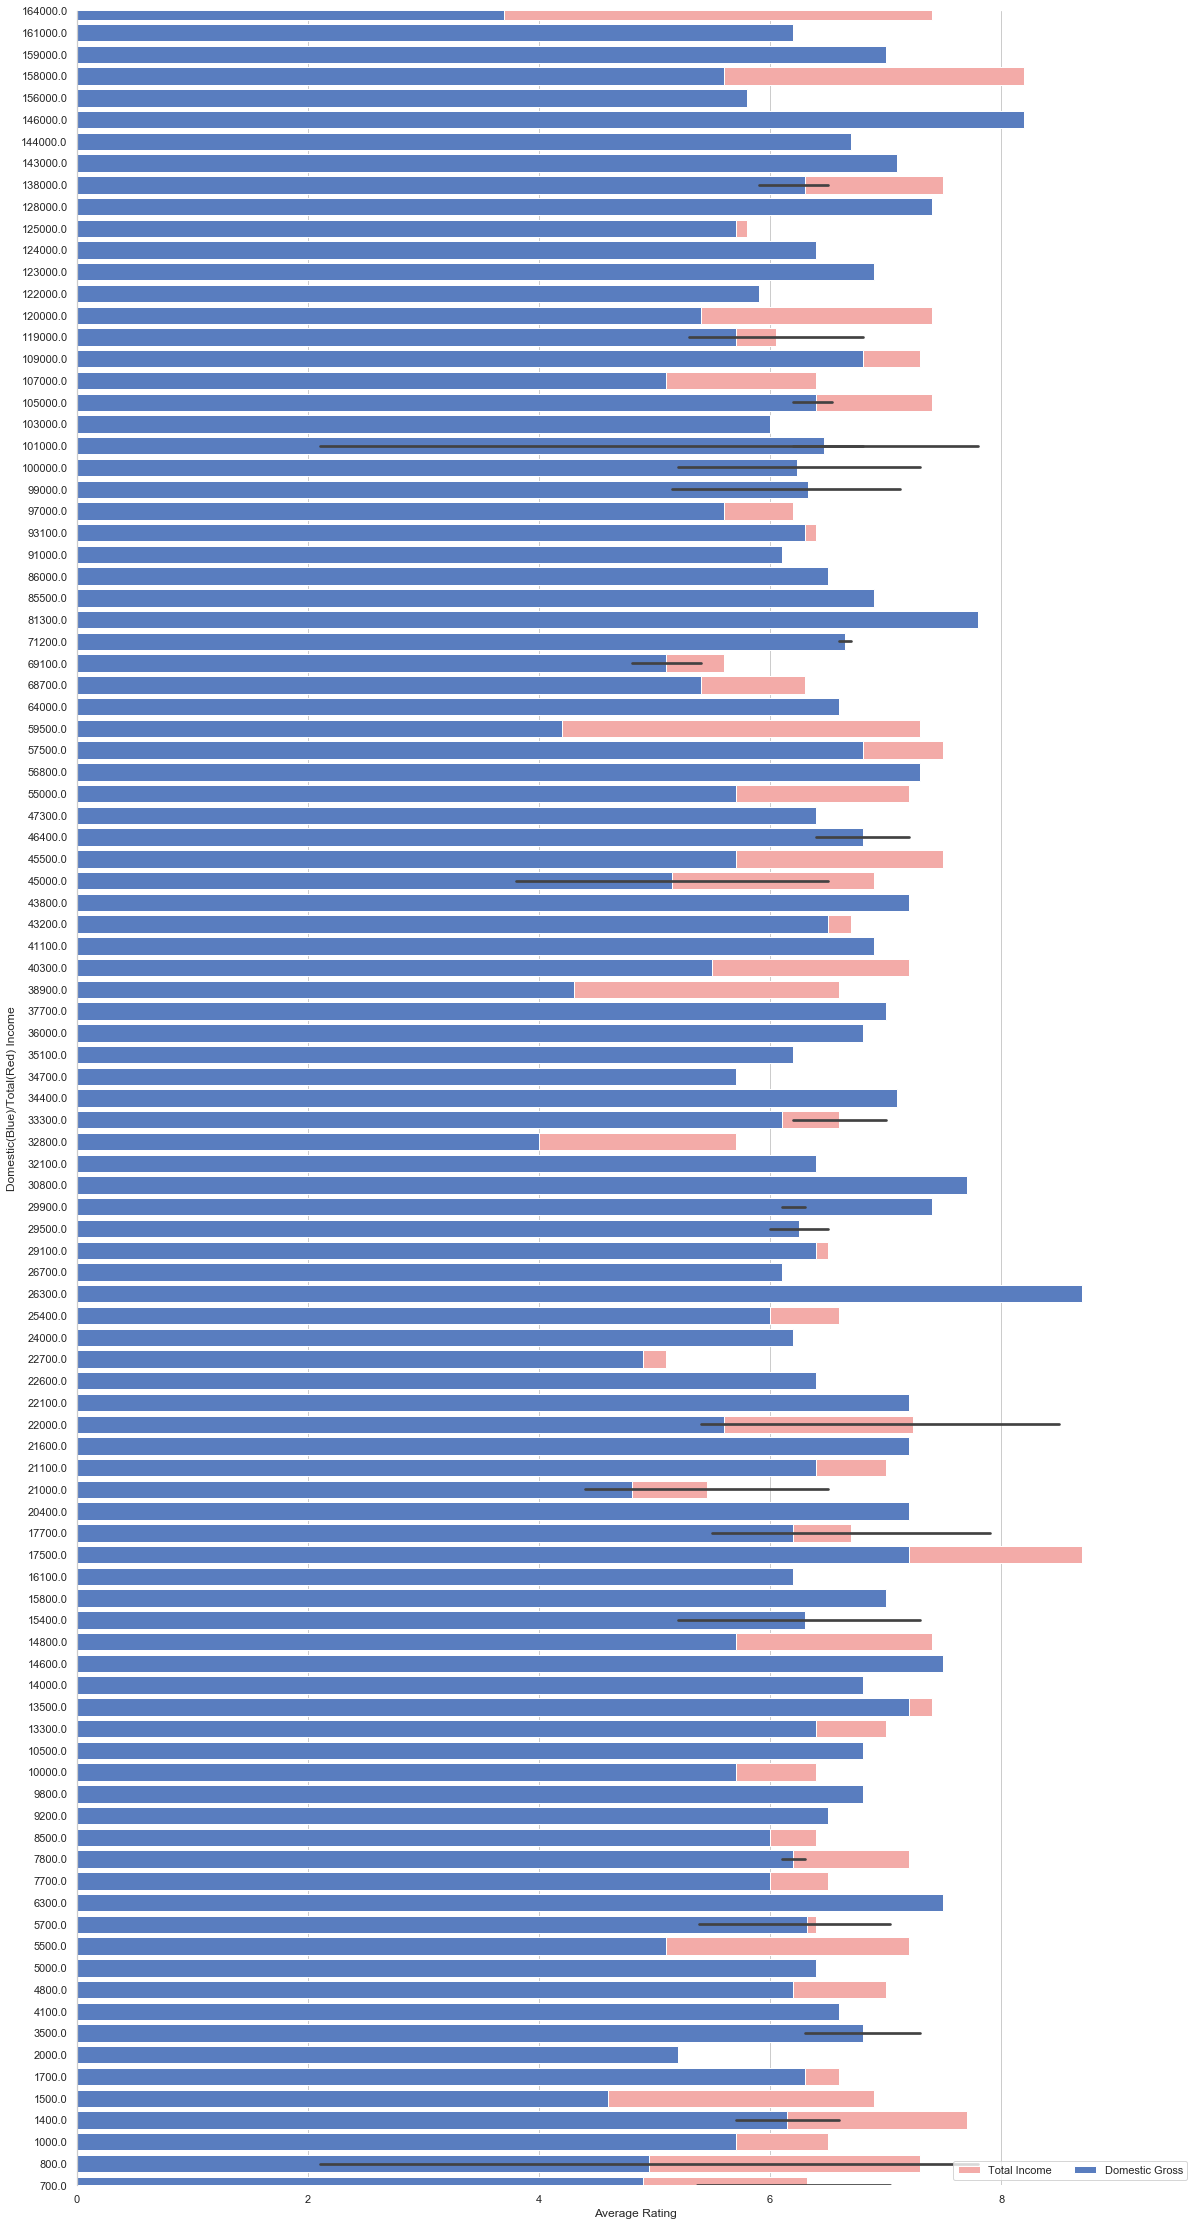

In [114]:
import seaborn as sns
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

crashes = ratings_merged_table.sort_values("averagerating", ascending=True)
# fil_titles = list(crashes.iloc(0,).obj.to_dict().values())

sns.set_color_codes("pastel")
splot1 = sns.barplot(x="averagerating", y="total_income", data=crashes,
            label="Total Income", color="r", orient='h')

sns.set_color_codes("muted")
splot2 = sns.barplot(x="averagerating", y="domestic_gross", data=crashes,
            label="Domestic Gross", color="b", orient='h')


def autolabel(splot, fil_titles):
    for index, p in enumerate(splot.patches):
        splot.annotate(fil_titles[index], xy=(p.get_y() + p.get_height(), p.get_height()))


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 100), ylabel="Domestic(Blue)/Total(Red) Income",
       xlabel="Average Rating")
sns.despine(right=True, bottom=True)


In [115]:
ratings_merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
title              1517 non-null object
studio             1517 non-null object
domestic_gross     1517 non-null float64
foreign_gross      1514 non-null float64
year               1517 non-null int64
tconst             1517 non-null object
primary_title      1517 non-null object
start_year         1517 non-null int64
runtime_minutes    1517 non-null float64
genres             1517 non-null object
total_income       1514 non-null float64
averagerating      1517 non-null float64
numvotes           1517 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 165.9+ KB


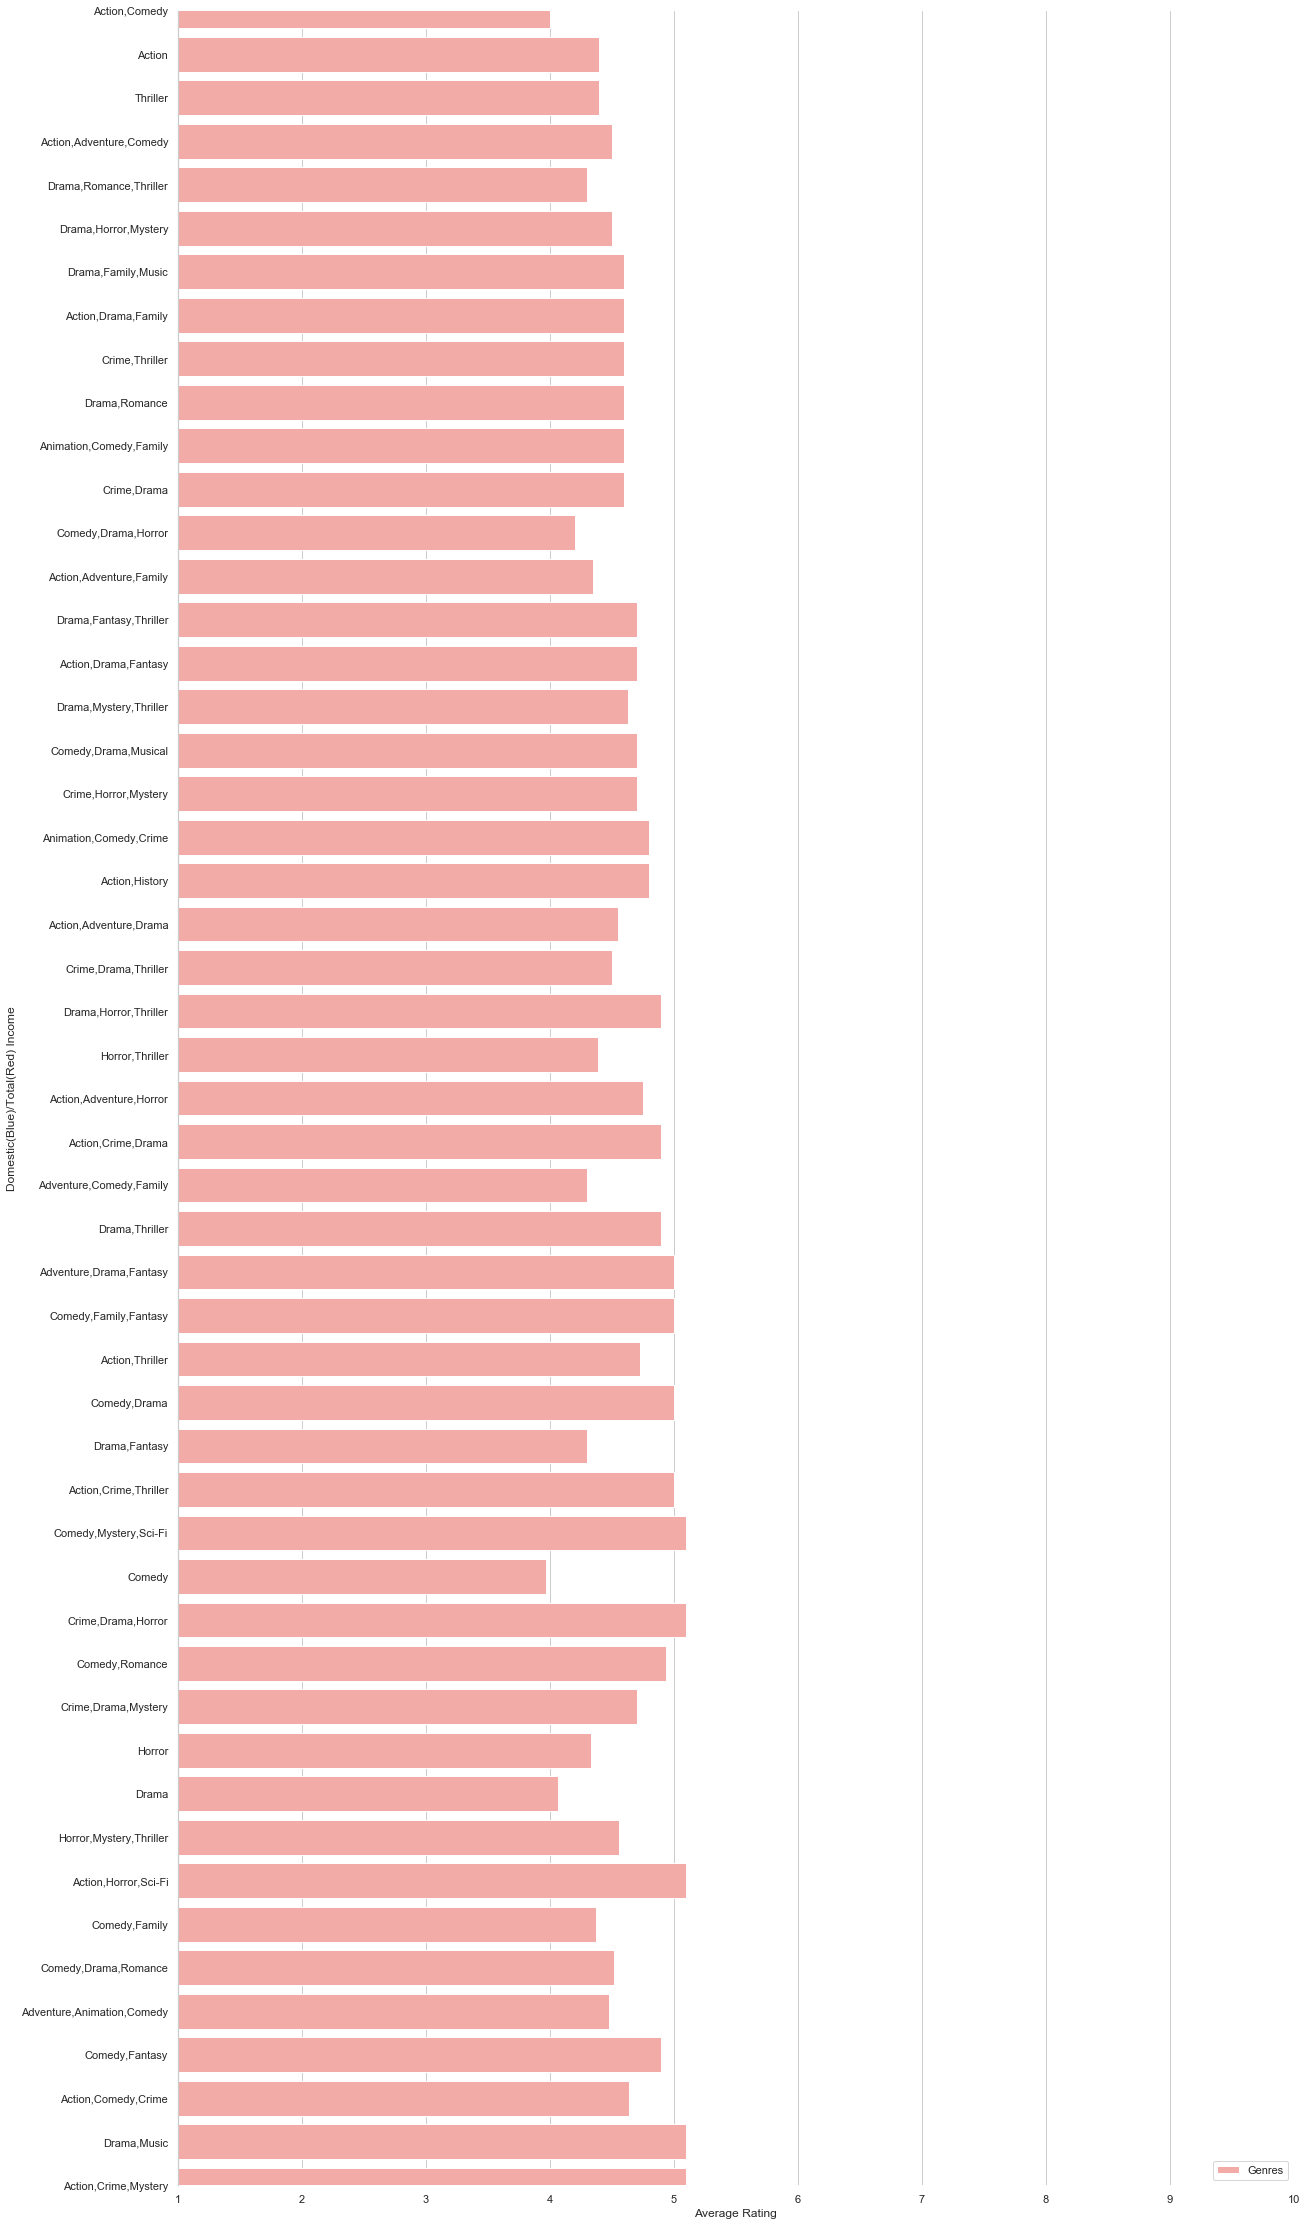

In [116]:
import seaborn as sns
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

crashes = ratings_merged_table.sort_values("averagerating", ascending=False).tail(150)
# fil_titles = list(crashes.iloc(0,).obj.to_dict().values())

sns.set_color_codes("pastel")
splot1 = sns.barplot(x="averagerating", y="genres", data=crashes,
            label="Genres", color="r", orient='h', ci= None)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 50), xlim=(1, 10), ylabel="Domestic(Blue)/Total(Red) Income",
       xlabel="Average Rating")
sns.despine(right=True, bottom=True)

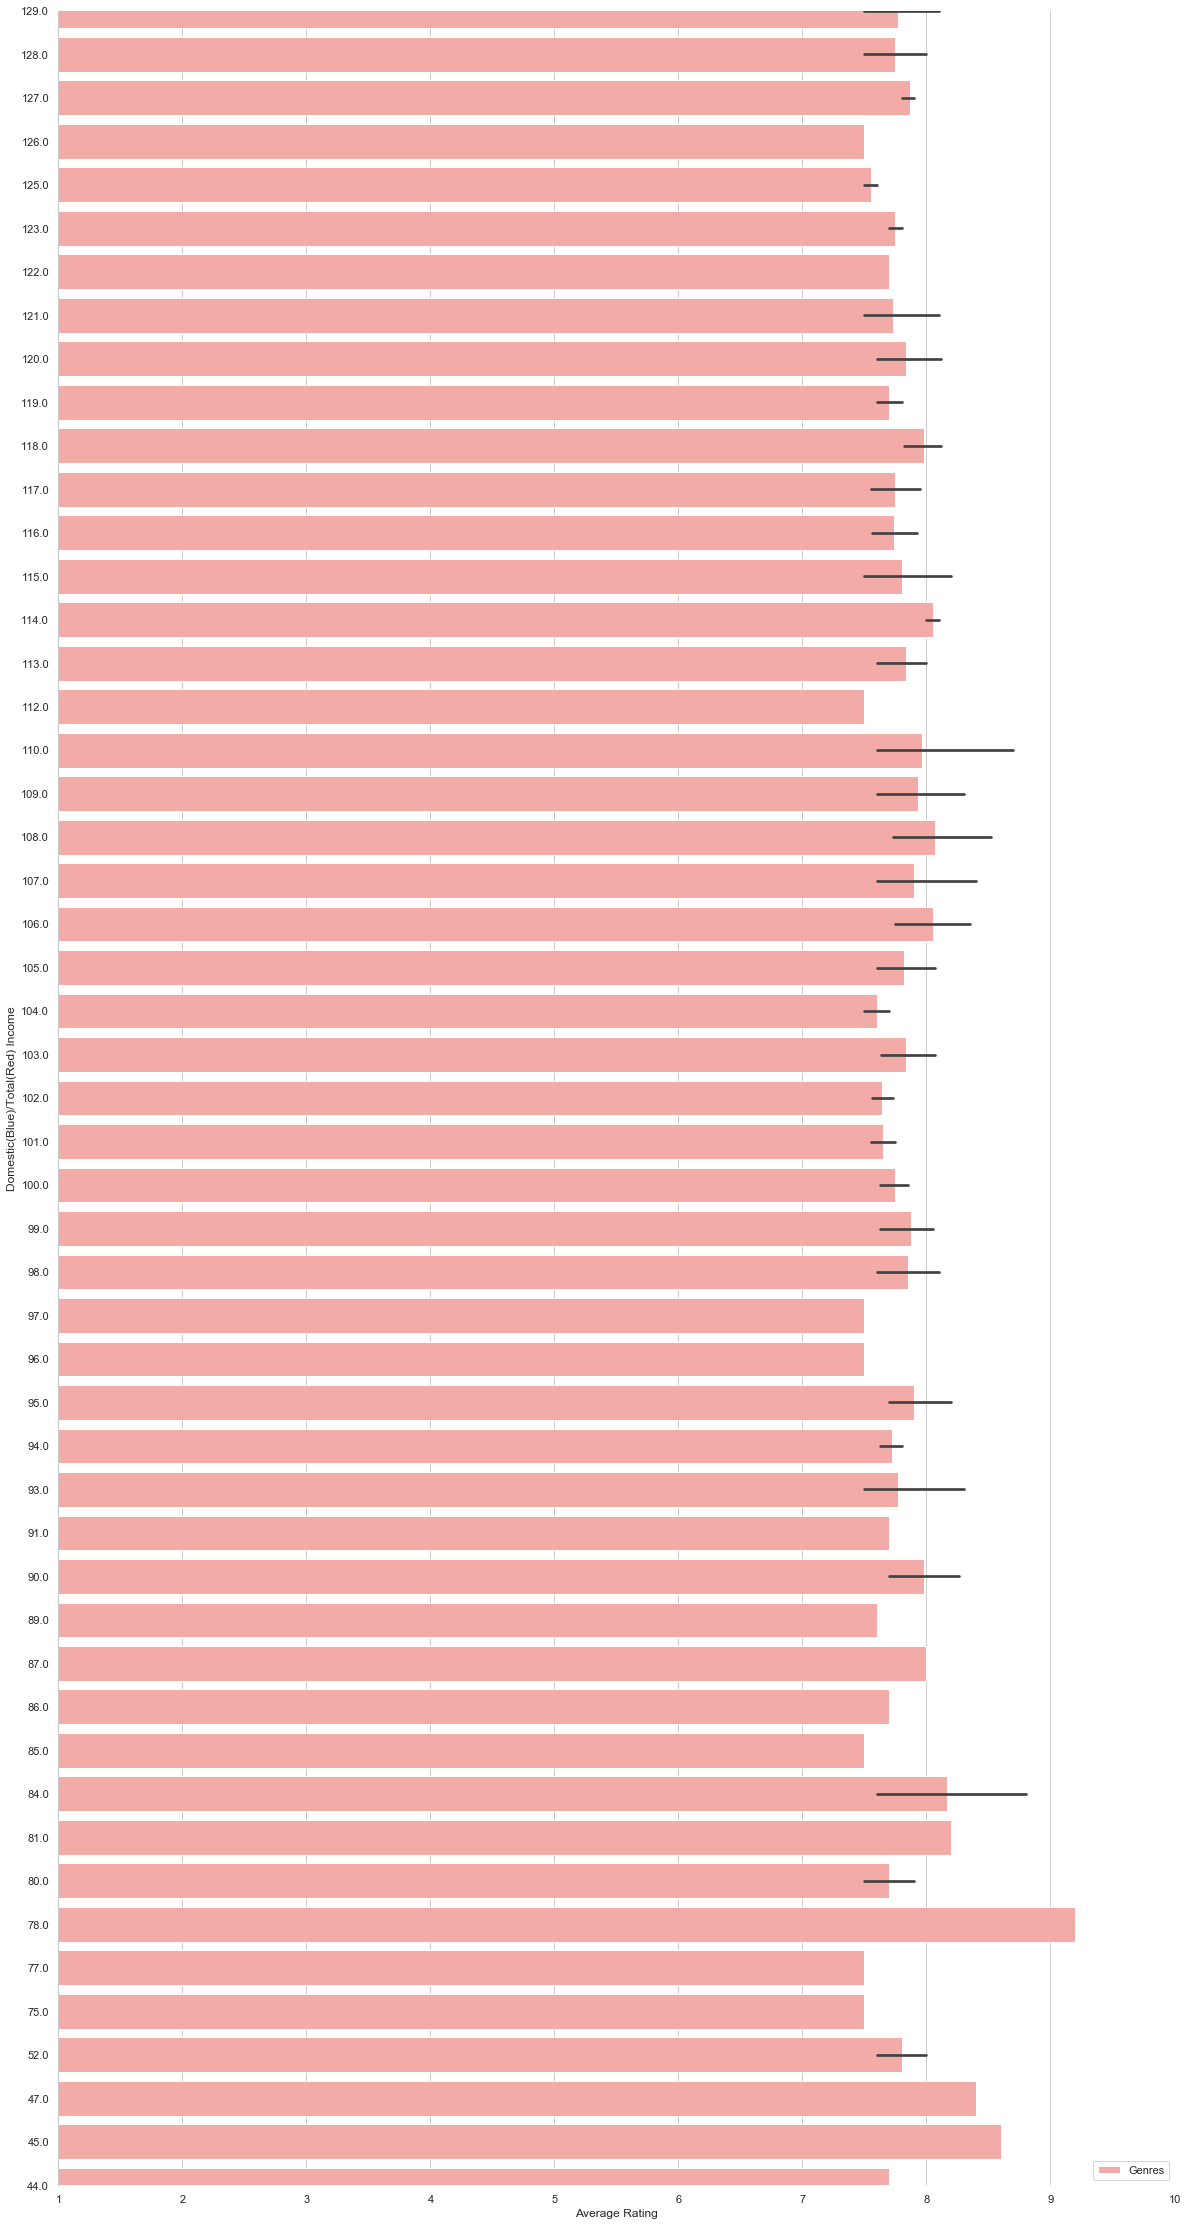

In [117]:
import seaborn as sns
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

above_7_5_rating = ratings_merged_table[ratings_merged_table["averagerating"] >= 7.5]

crashes = above_7_5_rating.sort_values("averagerating", ascending=False)
# fil_titles = list(crashes.iloc(0,).obj.to_dict().values())

sns.set_color_codes("pastel")
splot1 = sns.barplot(x="averagerating", y="runtime_minutes", data=crashes,
            label="Genres", color="r", orient='h')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 50), xlim=(1, 10), ylabel="Domestic(Blue)/Total(Red) Income",
       xlabel="Average Rating")
sns.despine(right=True, bottom=True)

#

In [118]:
above_7_5_rating = ratings_merged_table[ratings_merged_table["averagerating"] >= 7.5]
above_7_5_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 1512
Data columns (total 13 columns):
title              206 non-null object
studio             206 non-null object
domestic_gross     206 non-null float64
foreign_gross      205 non-null float64
year               206 non-null int64
tconst             206 non-null object
primary_title      206 non-null object
start_year         206 non-null int64
runtime_minutes    206 non-null float64
genres             206 non-null object
total_income       205 non-null float64
averagerating      206 non-null float64
numvotes           206 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 22.5+ KB


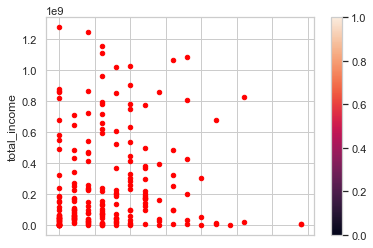

In [119]:
ax1 = above_7_5_rating.plot.scatter(x='averagerating',
                      c='Red',
                      y='total_income',
                      colormap='viridis')

In [120]:
without_duplicatetitles = ratings_merged_table[ratings_merged_table['title'].isin(ratings_merged_table[ratings_merged_table.duplicated(['title'])]['title'])]
without_duplicatetitles.sort_values('title')
without_duplicatetitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 14 to 1498
Data columns (total 13 columns):
title              287 non-null object
studio             287 non-null object
domestic_gross     287 non-null float64
foreign_gross      287 non-null float64
year               287 non-null int64
tconst             287 non-null object
primary_title      287 non-null object
start_year         287 non-null int64
runtime_minutes    287 non-null float64
genres             287 non-null object
total_income       287 non-null float64
averagerating      287 non-null float64
numvotes           287 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 31.4+ KB


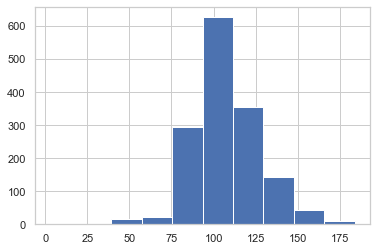

In [121]:
ratings_merged_table['runtime_minutes'].hist(bins=10)

In [122]:
ratings_merged_table.plot(kind=’hist’, bins=15)


SyntaxError: invalid character in identifier (<ipython-input-122-d1e795ddb2ad>, line 1)

In [ ]:

hist = above_7_5_rating.hist(bins=15)

In [ ]:
seperated_genres_list = []
for genres in above_7_5_rating['genres']:
    seperated_genres_list.extend(genres.split(','))
    
unique_genre = list(set(seperated_genres_list))
unique_genre = [genre for genre in unique_genre if not genre == 'nan']
unique_genre

In [ ]:
unique_genre = sorted(unique_genre)
new_genres = []
for genre in unique_genre:
    new_genres = above_7_5_rating[above_7_5_rating['genres'].str.contains(genre)]['id'].count()
    new_genres.append(new_genres)

ax = above_7_5_rating.plot.scatter(x='new_genres',
                      c='Red',
                      y='year',
                      colormap='viridis')

In [ ]:
above_7_5_rating.info()

In [ ]:
movie_genres = above_7_5_rating.set_index('primary_title').genres.str.split(',', expand=True).stack().reset_index('primary_title')
movie_genres.columns = ['movie', 'genre']
movie_genres.head(50)

In [ ]:
profitability_genres = movie_genres.merge(df_budjets, how='left', on='movie')

In [ ]:

profitability_genres['net_income'].isna().value_counts()

In [ ]:
profitability_genres = profitability_genres.dropna()
profitability_genres


In [ ]:
profitability_genres_mean = profitability_genres.groupby('genre').net_income.agg('mean').reset_index().sort_values('net_income', ascending=False).head(20)
profitability_genres_mean

In [ ]:

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x="genre", y="net_income", data=profitability_genres_mean, color=['green'])
#ax.set(ylim=(0,20))
ax.set_xticklabels(profitability_genres['genre'], 
                  )
plt.title('Net income Distribution for Genres', fontsize=25)
ax.set_ylabel('Net Income', fontsize=20)
ax.set_xlabel('Genre', fontsize=20)

In [ ]:
#popular producers

popular_producers = df_principals.query("category == 'director'")
popular_producers['job'].value_counts().head(10)

NameError: name 'top_10_total_profit' is not defined

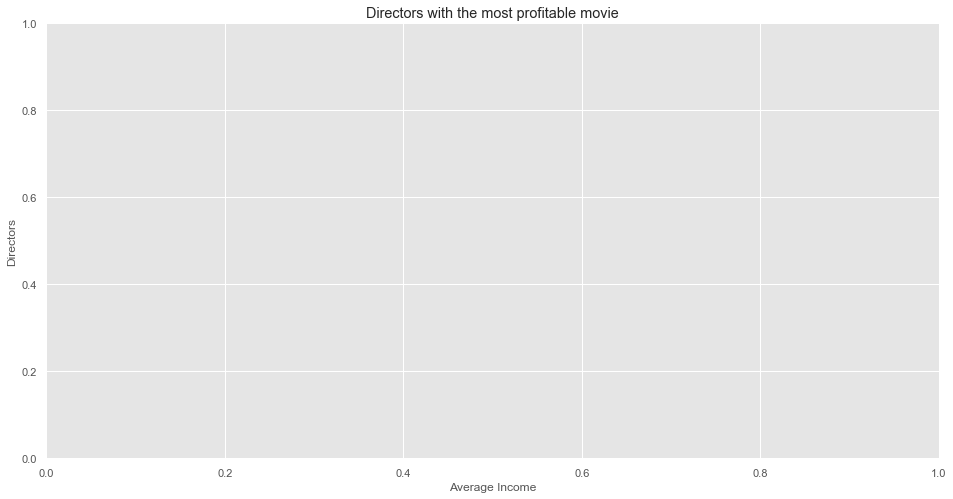

In [58]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Directors with the most profitable movie')
plt.ylabel('Directors')
plt.xlabel('Average Income')
ax.set(ylabel='Directors')
sns.barplot(top_10_total_profit.values, top_10_total_profit.index);